<a href="https://colab.research.google.com/github/Divyanshi-debug/NLP/blob/main/Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("headbrain.csv")

In [5]:
print(df.shape)
print(df.size)
df.head()

(237, 4)
948


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [6]:
x = df["Head Size(cm^3)"].values
y = df["Brain Weight(grams)"].values

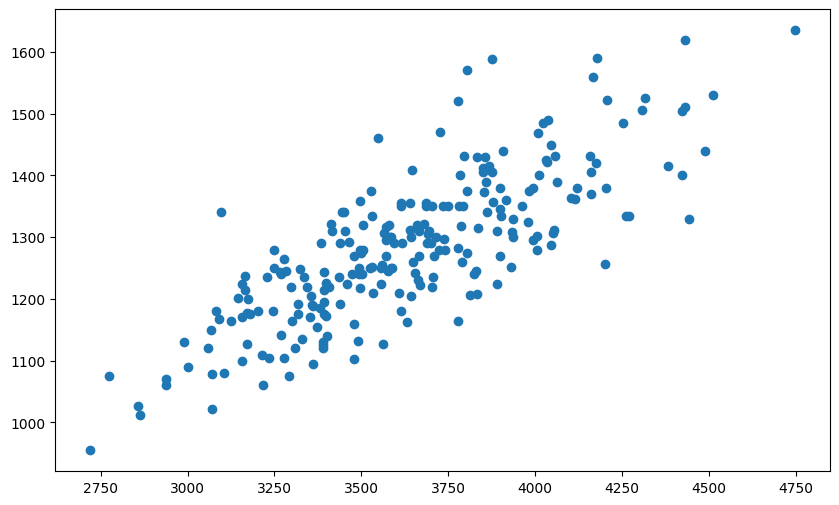

In [7]:
plt.figure(figsize = (10,6))
plt.scatter(x,y)
plt.show()

In [8]:
mean_x = np.mean(x)
mean_y = np.mean(y)

In [9]:
num = 0
d = 0
n = len(x)

for i in range(n):
  num += (y[i] - mean_y) * (x[i] - mean_x)
  d +=   (x[i] - mean_x) ** 2
slope = num / d
intercept = mean_y - slope * mean_x

print("Slope : ", slope)
print("intercept : ", intercept)

Slope :  0.26342933948939945
intercept :  325.57342104944223


In [10]:
prediction = []
num_samples = len(x)
for i in range(num_samples):
  y_pred = slope * x[i] + intercept
  prediction.append(int(y_pred))

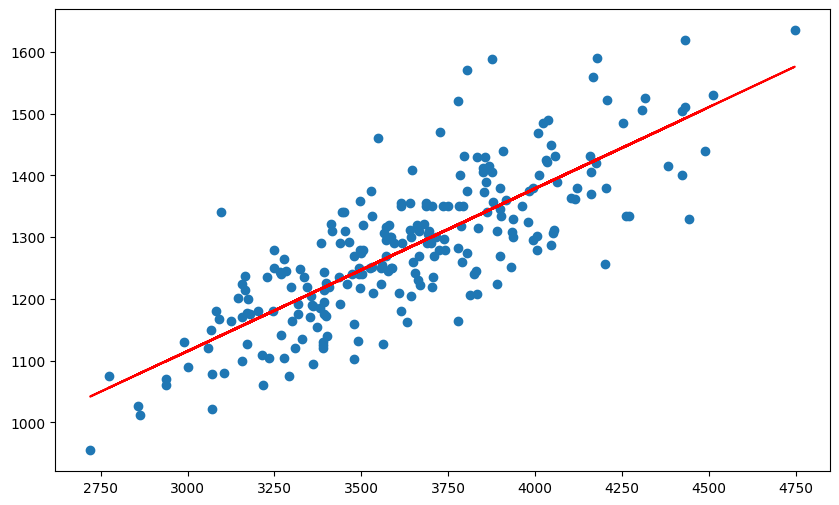

In [11]:
plt.figure(figsize = (10,6))
plt.scatter(x,y)
plt.plot(x, prediction, color = "red")
plt.show()

In [12]:
error = 0
for i in range(num_samples):
  error+=(prediction[i] - y[i]) ** 2

mse = error / num_samples
rmse = np.sqrt(mse)
print("MSE : ",mse)
print("RMSE : ",rmse)

MSE :  5202.9029535864975
RMSE :  72.13115106239812


# Gradient Decent

In [13]:
from sklearn.preprocessing import MinMaxScaler


In [14]:
x = np.reshape(x, (-1, 1))
y = np.reshape(y, (-1, 1))
minmax = MinMaxScaler()
scaled_x = minmax.fit_transform(x)
scaled_y = minmax.fit_transform(y)

In [15]:
scaled_x[:5]

array([[0.88406512],
       [0.50222003],
       [0.7602368 ],
       [0.52146029],
       [0.71879625]])

In [16]:
def gradient_decent(epochs, alpha):
  slope, inter = 0,0
  for i in range (epochs):
    y_pred = slope * scaled_x + inter
    loss = y_pred - scaled_y
    grandSlope = (2/num_samples) * np.dot(loss.T, scaled_x) # transpose
    grandInter = (2/num_samples) * np.sum(loss)
    slope = slope - grandSlope * alpha
    inter = inter - grandInter * alpha
  return slope, inter

In [17]:
epochs = 8888+2
alpha  = 0.01
slope, inter = gradient_decent(epochs, alpha)
print(slope)
print(intercept)

[[0.78011665]]
325.57342104944223


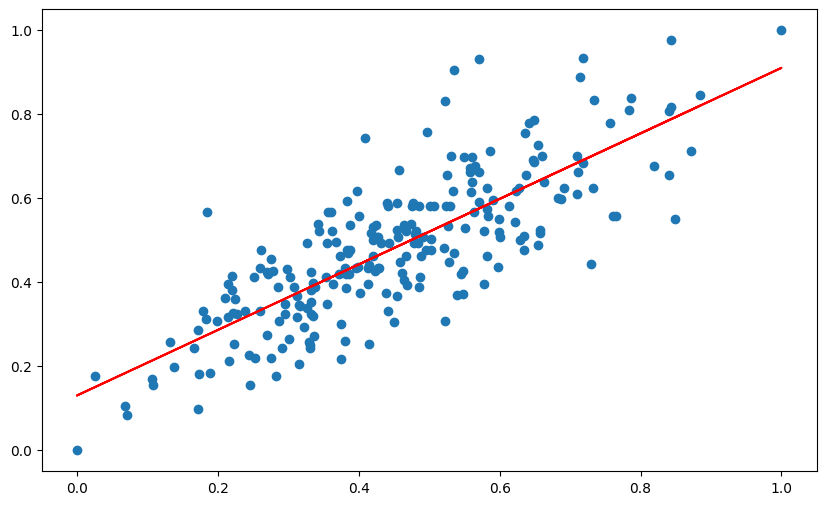

In [18]:
productions = slope * scaled_x + inter # Calculate all predictions at once as a (N, 1) array
plt.figure(figsize = (10,6))
plt.scatter(scaled_x, scaled_y)
plt.plot(scaled_x, productions,"r")
plt.show()